In [ ]:
# https://www.kaggle.com/henriqueyamahata/bank-marketing

In [ ]:
"""The purpose of this analysis is to predict whether or not a customer will make a new deposit into a current or new account after
a given campagin.""".replace("\n", "")

# Results
 - scroll down to see the full work flow

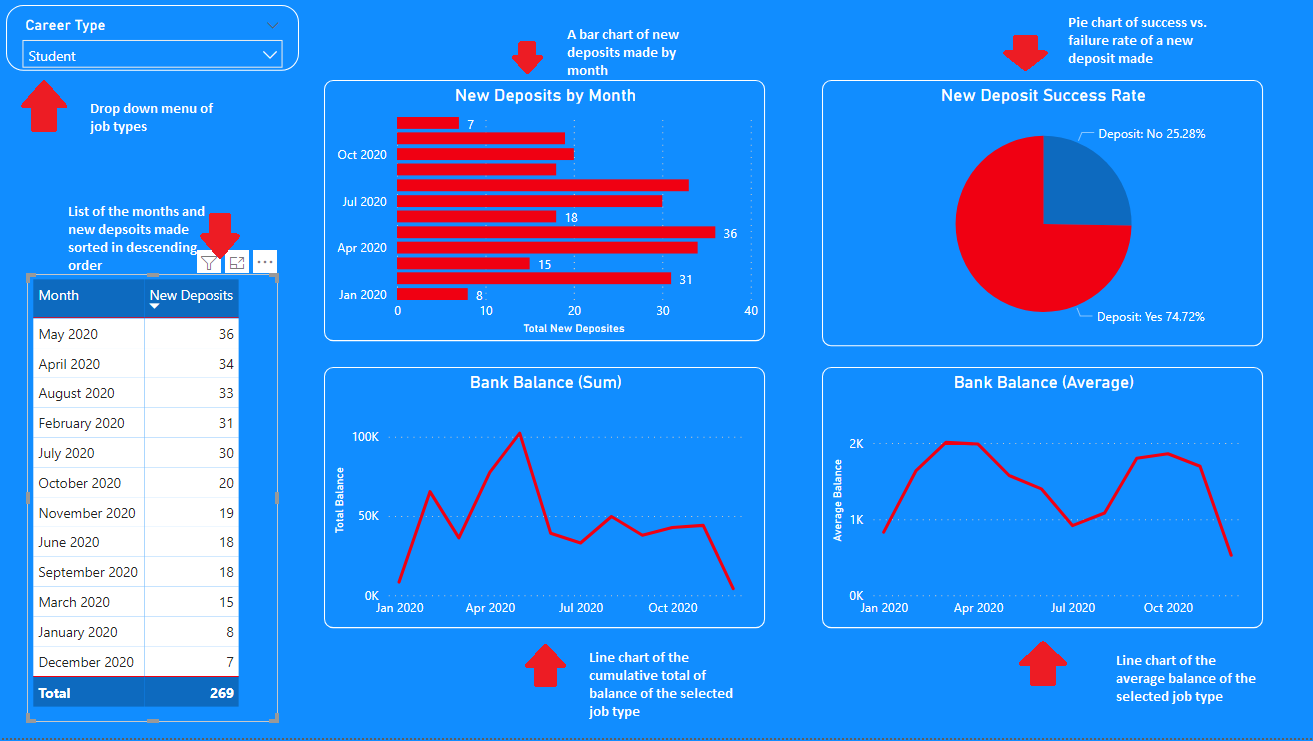

In [1]:
from IPython.display import Image
Image("bank_dashboard.PNG") # dashboard was created in Power BI

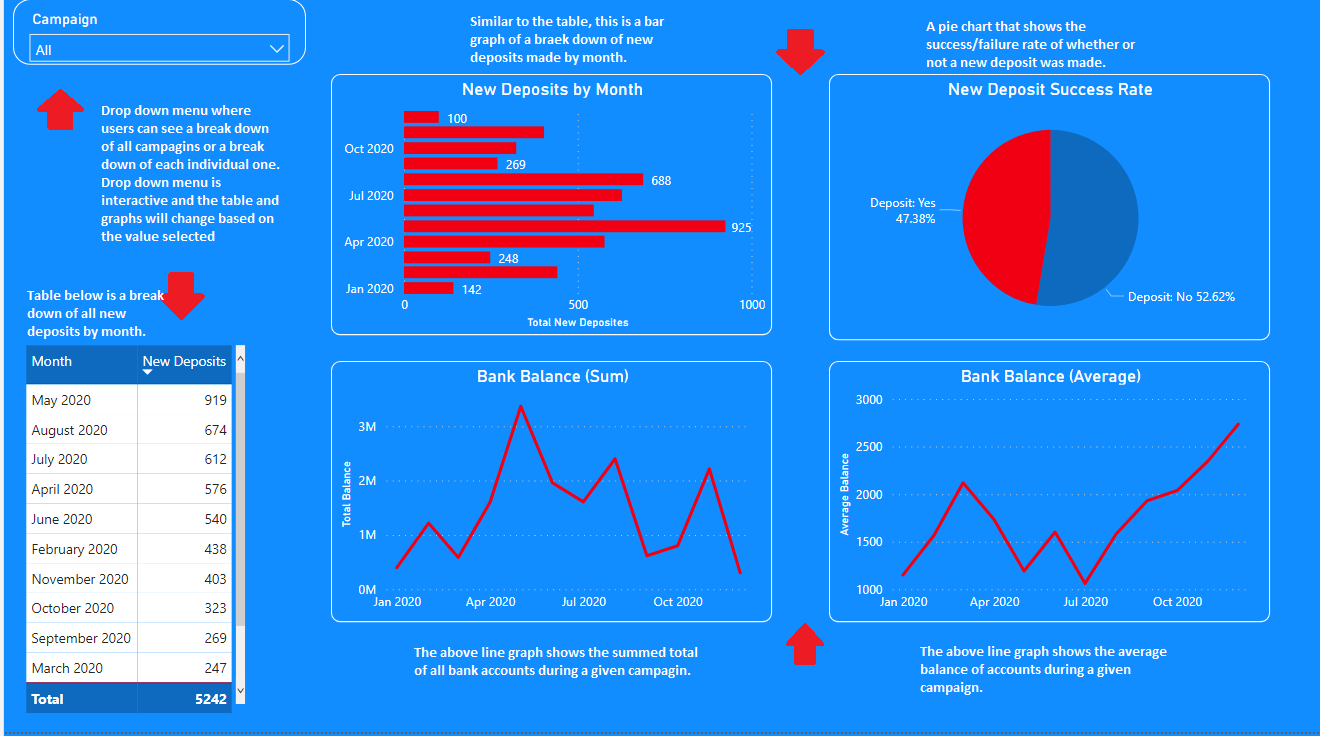

In [3]:
Image("bank_dashboard_2.PNG") 

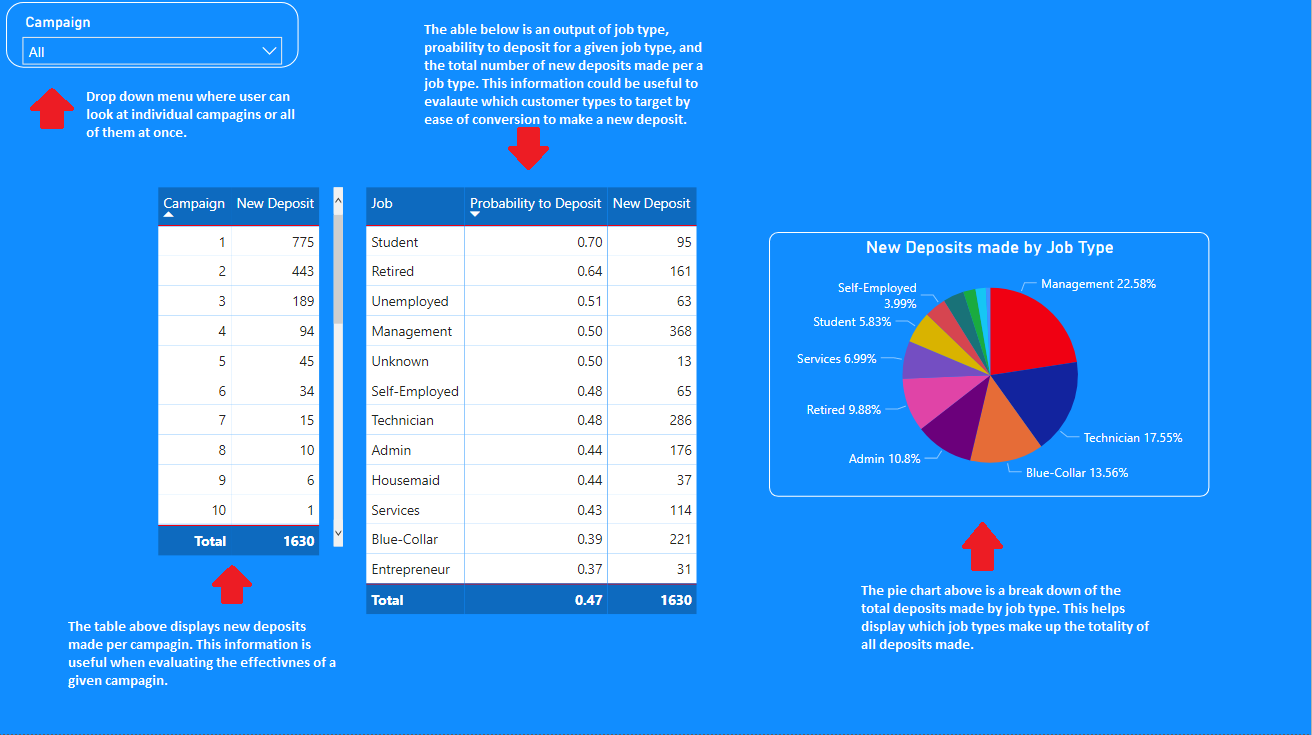

In [2]:
Image("bank_dashboard_3.PNG") # dashboard was created in Power BI

In [48]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

Precision: 0.81
Recall: 0.81
Accuracy: 0.81


In [49]:
"""A Precision score of 82%  tells me that when the model is making a prediction of 1 (makes depsoit) it is correct 82% of the time.
 A recall score of 82% tells me that this model is able to detect 82% of customers who are likely to make a deposit. Lastly, an accuracy of 
80% means that whenever this model is making a prediction, whether 0 (no deposit) or 1 (depsoit) it is correct 80% of the time.""".replace("\n","")

'A Precision score of 82%  tells me that when the model is making a prediction of 1 (makes depsoit) it is correct 82% of the time. A recall score of 82% tells me that this model is able to detect 82% of customers who are likely to make a deposit. Lastly, an accuracy of 80% means that whenever this model is making a prediction, whether 0 (no deposit) or 1 (depsoit) it is correct 80% of the time.'

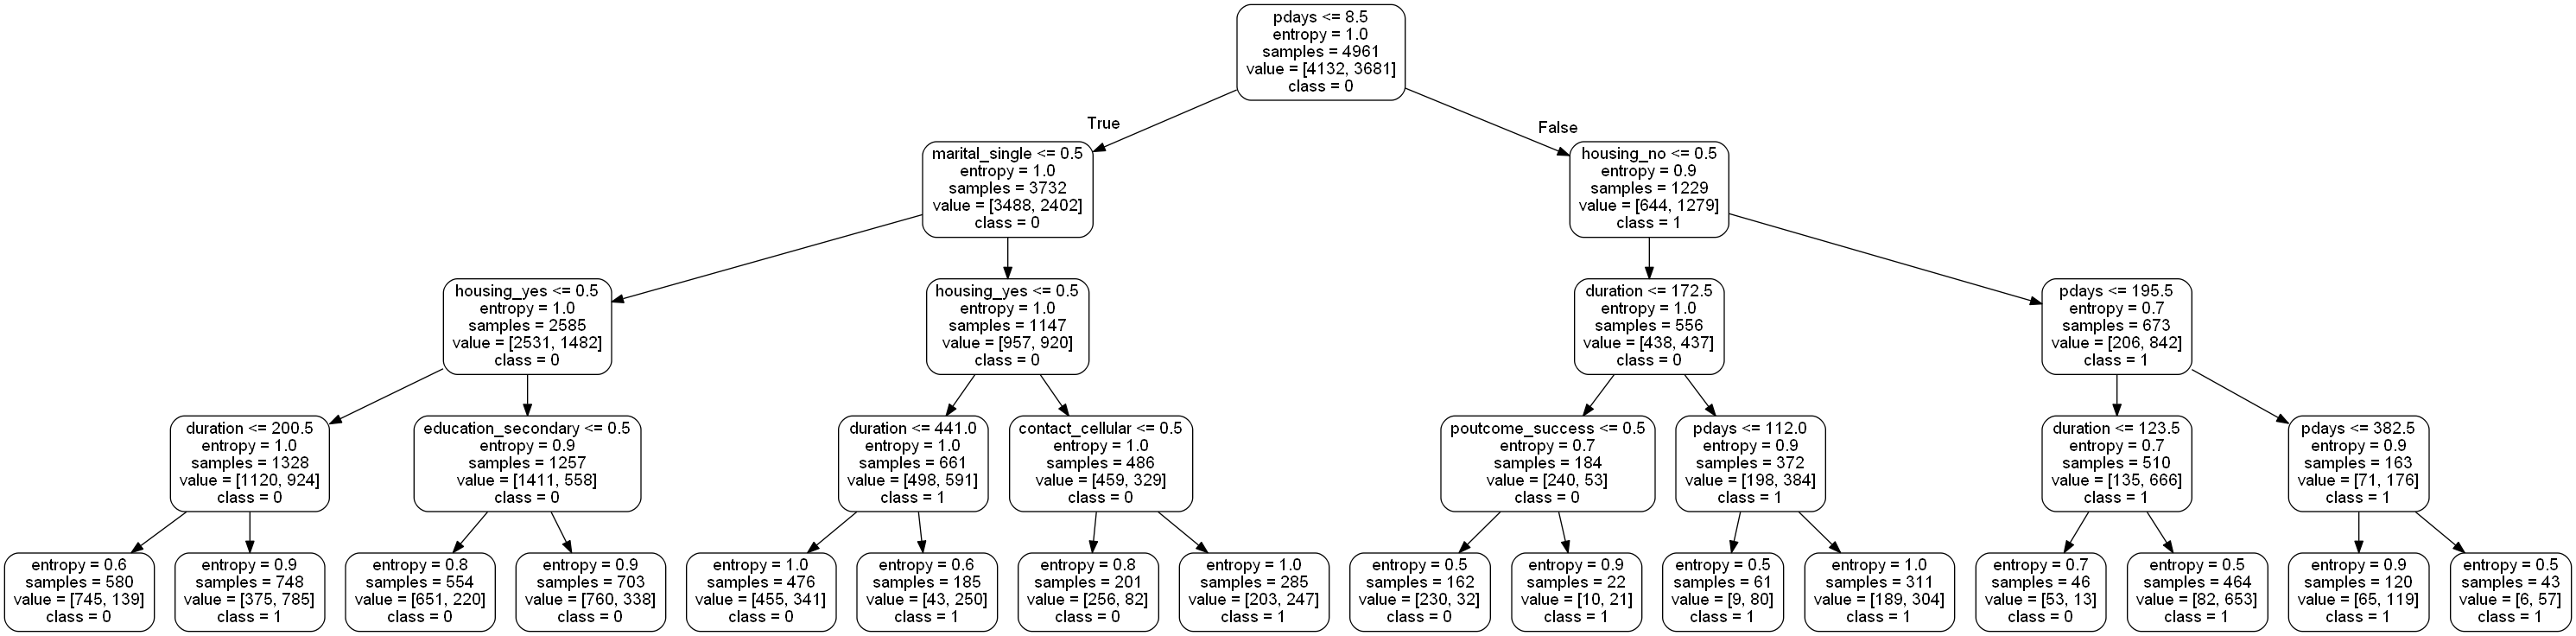

In [55]:
Image(graph.create_png())

In [51]:
"""The above is one of the random forrest trees that I created. It it maps out how an individual data point is classfied by sorting each 
of its values (Features) based on whether or not it meeets a specific nodes threshold value.""".replace("\n", "")

'The above is one of the random forrest trees that I created. It it maps out how an individual data point is classfied by sorting each of its values (Features) based on whether or not it meeets a specific nodes threshold value.'

In [52]:
filterwarnings('ignore')

predictions_df_signed = predictions_df[predictions_df['prediction'] == 1]
predictions_df_signed.drop('month', axis = 1, inplace = True)
predictions_df_signed.head(5)

,Job,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediction,probability
0,Management,30,2,1031,8,-1,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0.581599
1,Admin,34,479,515,1,350,5,1,0,0,...,0,1,0,0,1,0,0,0,1,0.583812
3,Technician,32,1547,289,1,805,4,0,0,0,...,0,1,0,0,0,1,0,0,1,0.714932
6,Services,29,1934,271,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0.544451
7,Management,40,2763,566,1,395,2,0,0,0,...,0,1,0,0,0,0,1,0,1,0.778877


In [53]:
"""The above dataframe is a list of customers who were predicted to make a deposit after being exposed to a given campagin. These and their listed probabilites would make a 
good starting point of who to target during a campagin""".replace("\n", "")

'The above dataframe is a list of customers who were predicted to make a deposit after being exposed to a given campagin. These and their listed probabilites would make a good starting point of who to target during a campagin'

In [54]:
jobs = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
for i  in jobs:
    print(i)
    print(predictions_df[predictions_df[i] == 1]['probability'].describe())

job_admin.
count    397.000000
mean       0.462643
std        0.176540
min        0.162058
25%        0.333852
50%        0.452318
75%        0.582240
max        0.854354
Name: probability, dtype: float64
job_blue-collar
count    605.000000
mean       0.407914
std        0.161495
min        0.151539
25%        0.281302
50%        0.411841
75%        0.523701
max        0.847764
Name: probability, dtype: float64
job_entrepreneur
count    105.000000
mean       0.425999
std        0.152145
min        0.165836
25%        0.307235
50%        0.427025
75%        0.536121
max        0.805994
Name: probability, dtype: float64
job_housemaid
count    66.000000
mean      0.440189
std       0.155357
min       0.156705
25%       0.301651
50%       0.479306
75%       0.564589
max       0.855809
Name: probability, dtype: float64
job_management
count    793.000000
mean       0.496636
std        0.172557
min        0.158361
25%        0.358865
50%        0.496600
75%        0.606618
max        0.863055

In [ ]:
"""Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:
students (70%), retirees (64%), and management (50%) type of job roles""".replace("\n","")

# Load Libraries

In [4]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter
from IPython.display import Image


# Data Viz
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score, confusion_matrix

# Load Data

In [5]:
bank_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\Bank\bank_term_deposit.csv')

In [6]:
print("rows:", bank_data.shape[0])
print("columns:", bank_data.shape[1])

rows: 11162
columns: 17


In [7]:
bank_data.isnull().sum() # there are no missing values in this data set

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
bank_data['job'].value_counts() # count of the different job types of a given customer

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [9]:
bank_data.loc[bank_data['job'] == 'management', 'Job'] = 'Management'
bank_data.loc[bank_data['job'] == 'blue-collar', 'Job'] = 'Blue-Collar'
bank_data.loc[bank_data['job'] == 'technician', 'Job'] = 'Technician'
bank_data.loc[bank_data['job'] == 'admin.', 'Job'] = 'Admin'
bank_data.loc[bank_data['job'] == 'services', 'Job'] = 'Services'
bank_data.loc[bank_data['job'] == 'retired', 'Job'] = 'Retired'


bank_data.loc[bank_data['job'] == 'self-employed', 'Job'] = 'Self-Employed'
bank_data.loc[bank_data['job'] == 'student', 'Job'] = 'Student'
bank_data.loc[bank_data['job'] == 'unemployed', 'Job'] = 'Unemployed'
bank_data.loc[bank_data['job'] == 'entrepreneur', 'Job'] = 'Entrepreneur'
bank_data.loc[bank_data['job'] == 'housemaid', 'Job'] = 'Housemaid'
bank_data.loc[bank_data['job'] == 'unknown', 'Job'] = 'Unknown'

bank_data.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Job
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Admin
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Admin
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Technician
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Services
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Admin
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,Management
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,Management
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,Retired
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,Technician
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes,Services


In [10]:
bank_data.set_index(['Job','month'], inplace=True)
deposit = bank_data['deposit']
bank_data.head(3)

age         job  marital  education default  balance  \
Job        month                                                         
Admin      may     59      admin.  married  secondary      no     2343   
           may     56      admin.  married  secondary      no       45   
Technician may     41  technician  married  secondary      no     1270   

                 housing loan  contact  day  duration  campaign  pdays  \
Job        month                                                         
Admin      may       yes   no  unknown    5      1042         1     -1   
           may        no   no  unknown    5      1467         1     -1   
Technician may       yes   no  unknown    5      1389         1     -1   

                  previous poutcome deposit  
Job        month                             
Admin      may           0  unknown     yes  
           may           0  unknown     yes  
Technician may           0  unknown     yes

# Data Exploration

In [11]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11162 entries, ('Admin', 'may') to ('Technician', 'jul')
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [12]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [13]:
deposit =round(bank_data['deposit'].value_counts()[1]/(bank_data['deposit'].value_counts()[0] + bank_data['deposit'].value_counts()[1])
,2)
no_deposit =round(bank_data['deposit'].value_counts()[0]/(bank_data['deposit'].value_counts()[0] + bank_data['deposit'].value_counts()[1])
,2)
print("Percentage of new deposit made:", deposit)
print("Percentage of no deposit made:", no_deposit)

Percentage of new deposit made: 0.47
Percentage of no deposit made: 0.53


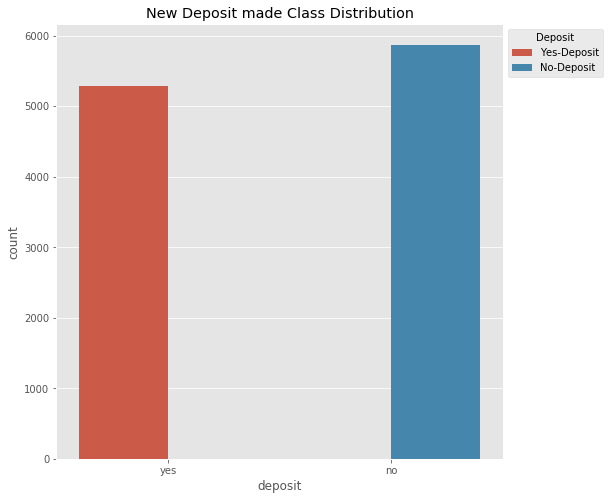

In [14]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x='deposit', hue='deposit' ,data=bank_data)




plt.title("New Deposit made Class Distribution")
legend_labels = ['Yes-Deposit', 'No-Deposit']
ax.legend(legend_labels,bbox_to_anchor=(1,1), title='Deposit')
plt.show()

In [15]:
"""Overall, the campagins lead to more people declining to make a new deposit. Moving forward, there should be a more targeted approach 
with future campagins that is focused on customers that are the most likely to make a deposit.""".replace("\n", "")

'Overall, the campagins lead to more people declining to make a new deposit. Moving forward, there should be a more targeted approach with future campagins that is focused on customers that are the most likely to make a deposit.'

# Model
 - Random Forrest

In [16]:
bank_data.drop(['day'], axis = 1, inplace = True) # dropping data that is not associated with a campagin or indiviual customer

In [17]:
bank_data = pd.get_dummies(bank_data)
bank_data.head(3)

age  balance  duration  campaign  pdays  previous  \
Job        month                                                      
Admin      may     59     2343      1042         1     -1         0   
           may     56       45      1467         1     -1         0   
Technician may     41     1270      1389         1     -1         0   

                  job_admin.  job_blue-collar  job_entrepreneur  \
Job        month                                                  
Admin      may             1                0                 0   
           may             1                0                 0   
Technician may             0                0                 0   

                  job_housemaid  ...  loan_yes  contact_cellular  \
Job        month                 ...                               
Admin      may                0  ...         0                 0   
           may                0  ...         0                 0   
Technician may                0  ...         0                 0   

                  contact_telephone  contact_unknown  poutcome_failure  \
Job        month                                                         
Admin      may                    0                1                 0   
           may                    0                1                 0   
Technician may                    0                1                 0   

                  poutcome_other  poutcome_success  poutcome_unknown  \
Job        month                                                       
Admin      may                 0                 0                 1   
           may                 0                 0                 1   
Technician may                 0                 0                 1   

                  deposit_no  deposit_yes  
Job        month                           
Admin      may             0            1  
           may             0            1  
Technician may             0            1  

[3 rows x 40 columns]

In [18]:
# shuffle the data
bank_data = bank_data.sample(frac=1)

In [19]:
bank_data['deposit_yes'] = bank_data['deposit_yes'].astype('bool').astype('int64')

In [20]:
X = bank_data.drop(['deposit_no', 'deposit_yes'], axis = 1)
y = bank_data.deposit_yes

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [22]:
rf = RandomForestClassifier(max_depth=4, criterion='entropy') # calling the random forrest model
rf.fit(X_train, y_train) # training the random forrest model
y_proba = rf.predict_proba(X_test) # making predictions on unseen data
y_pred = rf.predict(X_test) # making predictions on unseen data and associated probabilities of classifcation between each class value

In [23]:
pre = round(precision_score(y_test, y_pred, average='macro'),2)
re = round(recall_score(y_test, y_pred, average='macro'),2)
acc = round(accuracy_score(y_test, y_pred),2)

In [24]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

Precision: 0.79
Recall: 0.79
Accuracy: 0.79


In [25]:
"""I will tune this model to see if any improvements can be made."""

'I will tune this model to see if any improvements can be made.'

In [41]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
model_parameters = {

    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'criterion': ['gini'],
            'n_estimators':[100, 200, 300, 400, 500],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,5)),
            'n_jobs': [-1]
        }
    }
}

In [42]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = list()

for model_name, parameters in model_parameters.items():
    random_search = RandomizedSearchCV(parameters['model'], parameters['params'], cv = cv, n_iter=20) 
    random_search.fit(X,y)
    scores.append([model_name, dict(random_search.best_params_), random_search.best_score_])

In [43]:
data = pd.DataFrame(scores, columns = ['Model', 'Parameters', 'Score'])
data

,Model,Parameters,Score
0,Random Forest,"{'n_jobs': -1, 'n_estimators': 500, 'max_featu...",0.799454


In [44]:
data['Parameters'][0] # these will be the paramters used to create the random forrest 

{'n_jobs': -1,
 'n_estimators': 500,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'gini'}

In [45]:
rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt', max_depth=4, criterion='entropy', n_jobs= -1)
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)

In [46]:
pre = round(precision_score(y_test, y_pred, average='macro'),2)
re = round(recall_score(y_test, y_pred, average='macro'),2)
acc = round(accuracy_score(y_test, y_pred),2)

In [47]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

Precision: 0.81
Recall: 0.81
Accuracy: 0.81


In [33]:
"""After hyperparameter tuning, the model improve by 2 percentage point across the board, while this is marginal, this will be the final model used for predictions""".replace("/n","")

'After hyperparameter tuning, the model improve by 2 percentage point across the board, while this is marginal, this will be the final model used for predictions'

In [34]:
predictions_df = X_test.copy()
predictions_df['prediction'] = y_pred
predictions_df['probability'] = y_proba[:,1]
predictions_df.head()

,,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediction,probability
Job,month,,,,,,,,,,,,,,,,,,,,,
Management,jul,30,2,1031,8,-1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0.581599
Admin,may,34,479,515,1,350,5,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0.583812
Management,jul,36,909,250,3,-1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0.386738
Technician,oct,32,1547,289,1,805,4,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0.714932
Management,may,33,1195,355,4,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.360717


In [35]:
predictions_df.reset_index(inplace=True)

In [36]:
predictions_df.head(3)

,Job,month,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediction,probability
0,Management,jul,30,2,1031,8,-1,0,0,0,...,1,1,0,0,0,0,0,1,1,0.581599
1,Admin,may,34,479,515,1,350,5,1,0,...,0,1,0,0,1,0,0,0,1,0.583812
2,Management,jul,36,909,250,3,-1,0,0,0,...,1,1,0,0,0,0,0,1,0,0.386738


In [37]:
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='predictions_df.csv')  
predictions_df.to_csv('predictions_df.zip', index=False, compression = compression_opts)

In [38]:
jobs = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
for i  in jobs:
    print(i)
    print(predictions_df[predictions_df[i] == 1]['probability'].describe())

job_admin.
count    397.000000
mean       0.462643
std        0.176540
min        0.162058
25%        0.333852
50%        0.452318
75%        0.582240
max        0.854354
Name: probability, dtype: float64
job_blue-collar
count    605.000000
mean       0.407914
std        0.161495
min        0.151539
25%        0.281302
50%        0.411841
75%        0.523701
max        0.847764
Name: probability, dtype: float64
job_entrepreneur
count    105.000000
mean       0.425999
std        0.152145
min        0.165836
25%        0.307235
50%        0.427025
75%        0.536121
max        0.805994
Name: probability, dtype: float64
job_housemaid
count    66.000000
mean      0.440189
std       0.155357
min       0.156705
25%       0.301651
50%       0.479306
75%       0.564589
max       0.855809
Name: probability, dtype: float64
job_management
count    793.000000
mean       0.496636
std        0.172557
min        0.158361
25%        0.358865
50%        0.496600
75%        0.606618
max        0.863055

In [39]:
"""Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:
students (70%), retirees (64%), and management (50%) type of job roles""".replace("\n","")

'Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:students (70%), retirees (64%), and management (50%) type of job roles'

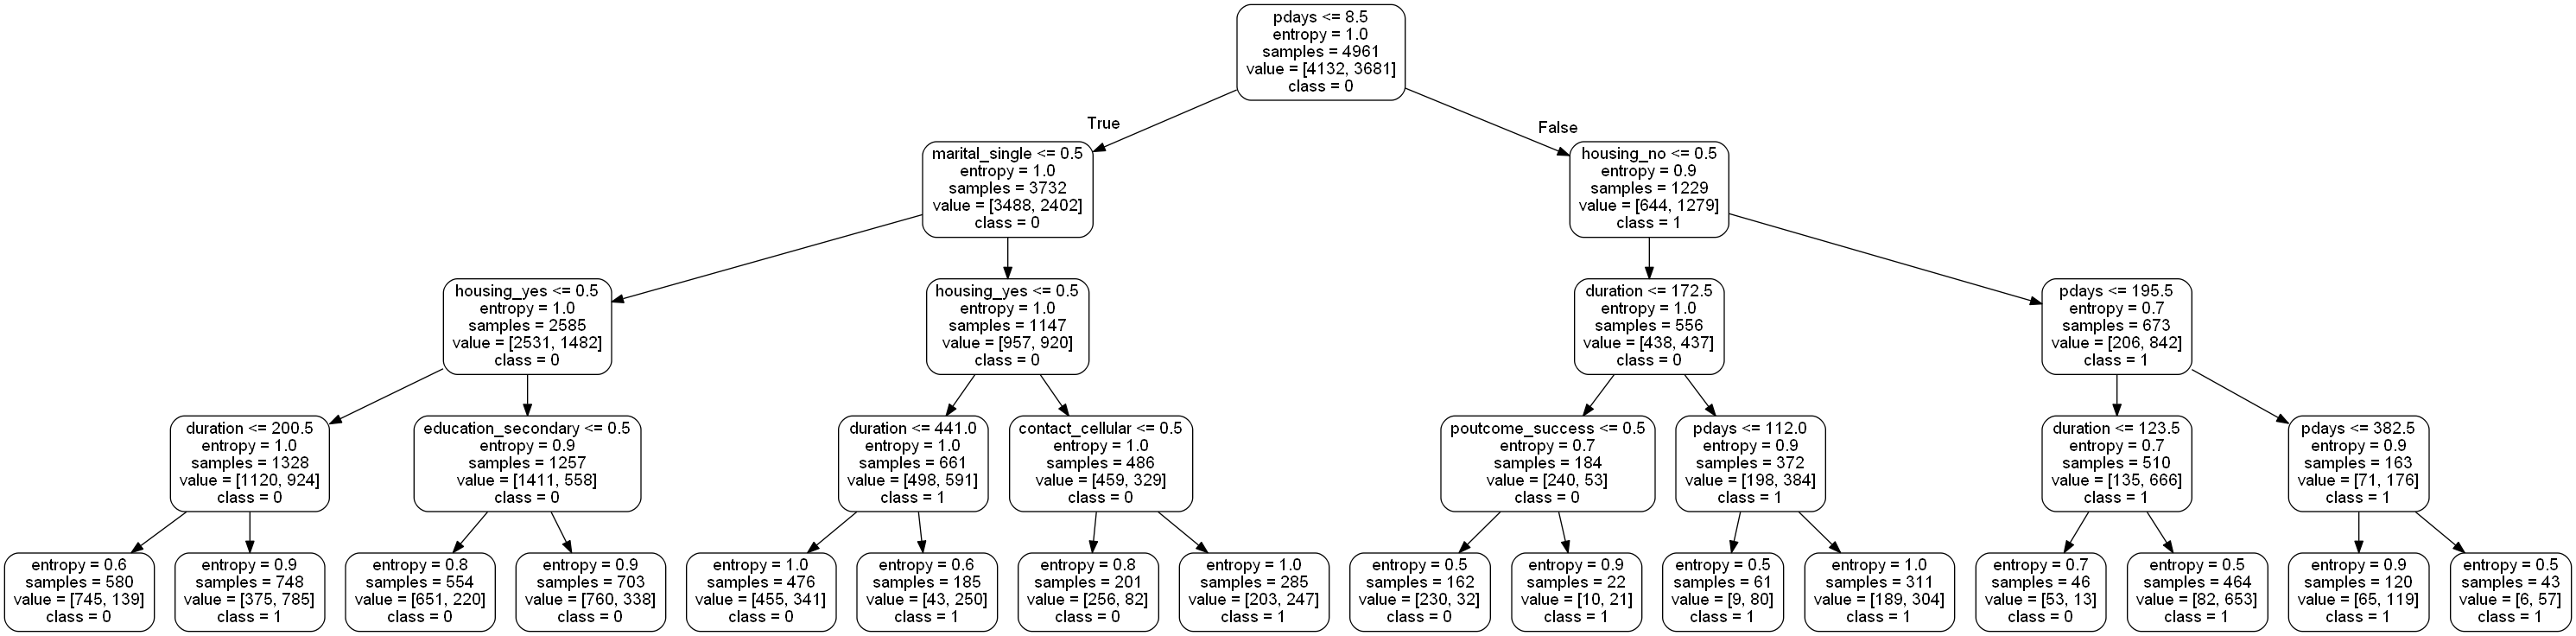

In [40]:
feature_cols = X_test.columns
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[7]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[7]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_cols, rounded = True, precision = 1,class_names=['0','1'])
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(graph.create_png())